In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


# 初始化环境数据

In [50]:

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# 定义数据转换
transform = transforms.Compose([
    transforms.ToTensor(),  # 将PIL图像转换为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 归一化
])

# 加载CIFAR-10训练集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

# 加载CIFAR-10测试集
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# 定义类别名称
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 卷积层1：输入3通道(RGB)，输出6通道，5x5卷积核
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 池化层：2x2窗口，步长2
        self.pool = nn.MaxPool2d(2, 2)
        # 卷积层2：输入6通道，输出16通道，5x5卷积核
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层1：输入16*5*5，输出120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # 全连接层2：输入120，输出84
        self.fc2 = nn.Linear(120, 84)
        # 全连接层3：输入84，输出10(对应10个类别)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 第一层卷积+ReLU+池化
        x = self.pool(F.relu(self.conv1(x)))
        # 第二层卷积+ReLU+池化
        x = self.pool(F.relu(self.conv2(x)))
        # 展平特征图
        x = x.view(-1, 16 * 5 * 5)
        # 全连接层+ReLU
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # 输出层
        x = self.fc3(x)
        return x

# 实例化网络
net = Net()

In [6]:

import torch.optim as optim

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()
# 随机梯度下降优化器
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [7]:

for epoch in range(10):  # 训练10个epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # 前向传播
        outputs = net(inputs)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 更新权重
        optimizer.step()
        
        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:  # 每2000个mini-batch打印一次
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.234
[1,  4000] loss: 1.870
[1,  6000] loss: 1.684
[1,  8000] loss: 1.609
[1, 10000] loss: 1.535
[1, 12000] loss: 1.503
[2,  2000] loss: 1.424
[2,  4000] loss: 1.395
[2,  6000] loss: 1.376
[2,  8000] loss: 1.351
[2, 10000] loss: 1.329
[2, 12000] loss: 1.339
[3,  2000] loss: 1.238
[3,  4000] loss: 1.231
[3,  6000] loss: 1.239
[3,  8000] loss: 1.220
[3, 10000] loss: 1.224
[3, 12000] loss: 1.187
[4,  2000] loss: 1.121
[4,  4000] loss: 1.133
[4,  6000] loss: 1.138
[4,  8000] loss: 1.120
[4, 10000] loss: 1.123
[4, 12000] loss: 1.124
[5,  2000] loss: 1.049
[5,  4000] loss: 1.040
[5,  6000] loss: 1.068
[5,  8000] loss: 1.066
[5, 10000] loss: 1.052
[5, 12000] loss: 1.056
[6,  2000] loss: 0.959
[6,  4000] loss: 0.992
[6,  6000] loss: 0.981
[6,  8000] loss: 1.007
[6, 10000] loss: 1.025
[6, 12000] loss: 1.001
[7,  2000] loss: 0.903
[7,  4000] loss: 0.936
[7,  6000] loss: 0.946
[7,  8000] loss: 0.956
[7, 10000] loss: 0.956
[7, 12000] loss: 0.967
[8,  2000] loss: 0.875
[8,  4000] 

In [8]:

correct = 0
total = 0
with torch.no_grad():  # 不计算梯度
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test images: {100 * correct / total:.2f}%')


Accuracy on test images: 61.91%


In [9]:


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {classes[i]:5s}: {100 * class_correct[i] / class_total[i]:.2f}%')


Accuracy of plane: 51.50%
Accuracy of car  : 71.60%
Accuracy of bird : 53.40%
Accuracy of cat  : 43.80%
Accuracy of deer : 50.60%
Accuracy of dog  : 49.70%
Accuracy of frog : 74.40%
Accuracy of horse: 66.90%
Accuracy of ship : 83.60%
Accuracy of truck: 73.60%


In [10]:

# 保存模型参数
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/3241138626.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [11]:


# 加载模型
net = Net()
net.load_state_dict(torch.load(PATH))


/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/103713143.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [20]:

# 使用模型进行预测
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   ship  truck plane


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [15]:

# 显示图片和预测结果
def imshow(img):
    img = img / 2 + 0.5  # 反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

In [21]:
# 获取测试图片
dataiter = iter(testloader)
images, labels = next(dataiter)


In [26]:
images_2, labels_2 = next(dataiter)

In [31]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [29]:
def show_test_images(num_images=100):
    """显示前num_images张测试图片及标签"""
    
    # 创建图形
    fig, axes = plt.subplots(10, 10, figsize=(20, 20))
    axes = axes.ravel()
    
    count = 0
    for i, (images, labels) in enumerate(testloader):
        if count >= num_images:
            break
            
        # 反归一化图片
        img = images[0] / 2 + 0.5
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))
        
        # 显示图片
        axes[count].imshow(img_np)
        axes[count].set_title(f'{i+1}-{classes[labels[0]]}', fontsize=12)
        axes[count].axis('off')
        
        # 打印信息到控制台
        print(f"图片 {count+1}: 类别 = {classes[labels[0]]} (标签值: {labels[0].item()})")
        
        count += 1
    
    plt.suptitle(f'CIFAR-10测试集前{num_images}张图片', fontsize=16)
    plt.tight_layout()
    timestamp = plt.datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    plt.savefig(f'test_images_100-{timestamp}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return count


In [32]:
"""缓存测试集数据到内存"""
print("正在缓存测试集数据...")
cache_images = []
cache_labels = []

for images, labels in testloader:
        cache_images.append(images[0])  # 去掉batch维度
        cache_labels.append(labels[0].item())
        
        print(f"已缓存 {len(cache_images)} 张测试图片")
    

正在缓存测试集数据...
已缓存 1 张测试图片
已缓存 2 张测试图片
已缓存 3 张测试图片
已缓存 4 张测试图片
已缓存 5 张测试图片
已缓存 6 张测试图片
已缓存 7 张测试图片
已缓存 8 张测试图片
已缓存 9 张测试图片
已缓存 10 张测试图片
已缓存 11 张测试图片
已缓存 12 张测试图片
已缓存 13 张测试图片
已缓存 14 张测试图片
已缓存 15 张测试图片
已缓存 16 张测试图片
已缓存 17 张测试图片
已缓存 18 张测试图片
已缓存 19 张测试图片
已缓存 20 张测试图片
已缓存 21 张测试图片
已缓存 22 张测试图片
已缓存 23 张测试图片
已缓存 24 张测试图片
已缓存 25 张测试图片
已缓存 26 张测试图片
已缓存 27 张测试图片
已缓存 28 张测试图片
已缓存 29 张测试图片
已缓存 30 张测试图片
已缓存 31 张测试图片
已缓存 32 张测试图片
已缓存 33 张测试图片
已缓存 34 张测试图片
已缓存 35 张测试图片
已缓存 36 张测试图片
已缓存 37 张测试图片
已缓存 38 张测试图片
已缓存 39 张测试图片
已缓存 40 张测试图片
已缓存 41 张测试图片
已缓存 42 张测试图片
已缓存 43 张测试图片
已缓存 44 张测试图片
已缓存 45 张测试图片
已缓存 46 张测试图片
已缓存 47 张测试图片
已缓存 48 张测试图片
已缓存 49 张测试图片
已缓存 50 张测试图片
已缓存 51 张测试图片
已缓存 52 张测试图片
已缓存 53 张测试图片
已缓存 54 张测试图片
已缓存 55 张测试图片
已缓存 56 张测试图片
已缓存 57 张测试图片
已缓存 58 张测试图片
已缓存 59 张测试图片
已缓存 60 张测试图片
已缓存 61 张测试图片
已缓存 62 张测试图片
已缓存 63 张测试图片
已缓存 64 张测试图片
已缓存 65 张测试图片
已缓存 66 张测试图片
已缓存 67 张测试图片
已缓存 68 张测试图片
已缓存 69 张测试图片
已缓存 70 张测试图片
已缓存 71 张测试图片
已缓存 72 张测试图片
已缓存 73 张测试图片
已缓存 74 张测试图片
已缓存 75 张测试图片
已缓存 76 张测试图片
已缓存 77 张

In [55]:
from typing import List, Tuple, Optional, Union

def show_images_by_indices(indices: List[int], figsize: Tuple[int, int] = None):
        """显示指定索引的图片"""
        if not indices:
            print("索引列表为空")
            return
        
        # 验证索引范围
        max_idx = len(cache_images) - 1
        valid_indices = [idx for idx in indices if 0 <= idx <= max_idx]
        invalid_indices = [idx for idx in indices if idx < 0 or idx > max_idx]
        
        if invalid_indices:
            print(f"无效索引: {invalid_indices}")
        
        if not valid_indices:
            print("没有有效的索引")
            return
        
        # 计算网格大小
        n_images = len(valid_indices)
        if figsize is None:
            figsize = (min(n_images * 2, 20), max(2, (n_images + 9) // 10 * 2))
        
        n_cols = min(10, n_images)
        n_rows = (n_images + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1 or n_cols == 1:
            axes = axes.flatten()
        else:
            axes = axes.flatten()
        
        for i, idx in enumerate(valid_indices):
            # 反归一化图片
            img = cache_images[idx] / 2 + 0.5
            img_np = img.numpy().transpose(1, 2, 0)
            img_np = np.clip(img_np, 0, 1)
            
            axes[i].imshow(img_np)
            axes[i].set_title(f'#{idx}: {[cache_labels[idx]]}:{classes[cache_labels[idx]]}')
            axes[i].axis('off')
            
            print(f"图片 #{idx}: 类别 = {classes[cache_labels[idx]]}, 标签值 = {cache_labels[idx]}")
        
        # 隐藏多余的子图
        for i in range(n_images, len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()

In [43]:
def show_images_by_range(start: int, end: int, step: int = 1):
        """显示指定范围的图片"""
        if start < 0:
            start = 0
        if end >= len(cache_images):
            end = len(cache_images) - 1
        
        indices = list(range(start, end + 1, step))
        show_images_by_indices(indices,None)


In [ ]:

def show_random_images(self, n_images: int = 9):
    """显示随机图片"""
    import random
    indices = random.sample(range(len(self.images)), min(n_images, len(self.images)))
    self.show_images_by_indices(indices)

def get_image_info(self, index: int) -> dict:
    """获取指定索引图片的详细信息"""
    if index < 0 or index >= len(self.images):
        return None
    
    return {
        'index': index,
        'label': self.labels[index],
        'class_name': self.classes[self.labels[index]],
        'image_shape': self.images[index].shape
    }

def search_by_class(self, class_name: str) -> List[int]:
    """搜索指定类别的所有图片索引"""
    class_name = class_name.lower()
    if class_name not in [c.lower() for c in self.classes]:
        print(f"类别 '{class_name}' 不存在")
        return []
    
    # 找到对应的类别索引
    class_idx = None
    for i, cls in enumerate(self.classes):
        if cls.lower() == class_name:
            class_idx = i
            break
    
    indices = [i for i, label in enumerate(self.labels) if label == class_idx]
    print(f"类别 '{self.classes[class_idx]}' 共有 {len(indices)} 张图片")
    return indices

def get_statistics(self):
    """获取测试集统计信息"""
    from collections import Counter
    label_counts = Counter(self.labels)
    
    print("CIFAR-10测试集统计:")
    print("=" * 30)
    for i, class_name in enumerate(self.classes):
        count = label_counts.get(i, 0)
        percentage = (count / len(self.images)) * 100
        print(f"{class_name:>5s}: {count:4d}张 ({percentage:5.1f}%)")
    
    return label_counts



2. 显示索引100-159的图片:
图片 #50: 类别 = dog, 标签值 = 5
图片 #51: 类别 = car, 标签值 = 1
图片 #52: 类别 = horse, 标签值 = 7
图片 #53: 类别 = dog, 标签值 = 5
图片 #54: 类别 = horse, 标签值 = 7
图片 #55: 类别 = horse, 标签值 = 7
图片 #56: 类别 = cat, 标签值 = 3
图片 #57: 类别 = horse, 标签值 = 7
图片 #58: 类别 = dog, 标签值 = 5
图片 #59: 类别 = deer, 标签值 = 4
图片 #60: 类别 = car, 标签值 = 1
图片 #61: 类别 = plane, 标签值 = 0
图片 #62: 类别 = bird, 标签值 = 2
图片 #63: 类别 = truck, 标签值 = 9
图片 #64: 类别 = cat, 标签值 = 3
图片 #65: 类别 = ship, 标签值 = 8
图片 #66: 类别 = plane, 标签值 = 0
图片 #67: 类别 = horse, 标签值 = 7
图片 #68: 类别 = frog, 标签值 = 6
图片 #69: 类别 = plane, 标签值 = 0
图片 #70: 类别 = truck, 标签值 = 9
图片 #71: 类别 = plane, 标签值 = 0
图片 #72: 类别 = horse, 标签值 = 7
图片 #73: 类别 = frog, 标签值 = 6
图片 #74: 类别 = frog, 标签值 = 6
图片 #75: 类别 = frog, 标签值 = 6
图片 #76: 类别 = frog, 标签值 = 6
图片 #77: 类别 = car, 标签值 = 1
图片 #78: 类别 = ship, 标签值 = 8
图片 #79: 类别 = horse, 标签值 = 7
图片 #80: 类别 = cat, 标签值 = 3
图片 #81: 类别 = deer, 标签值 = 4
图片 #82: 类别 = deer, 标签值 = 4
图片 #83: 类别 = cat, 标签值 = 3
图片 #84: 类别 = cat, 标签值 = 3
图片 #85: 类别 = bird, 标签值 = 2
图片 #86

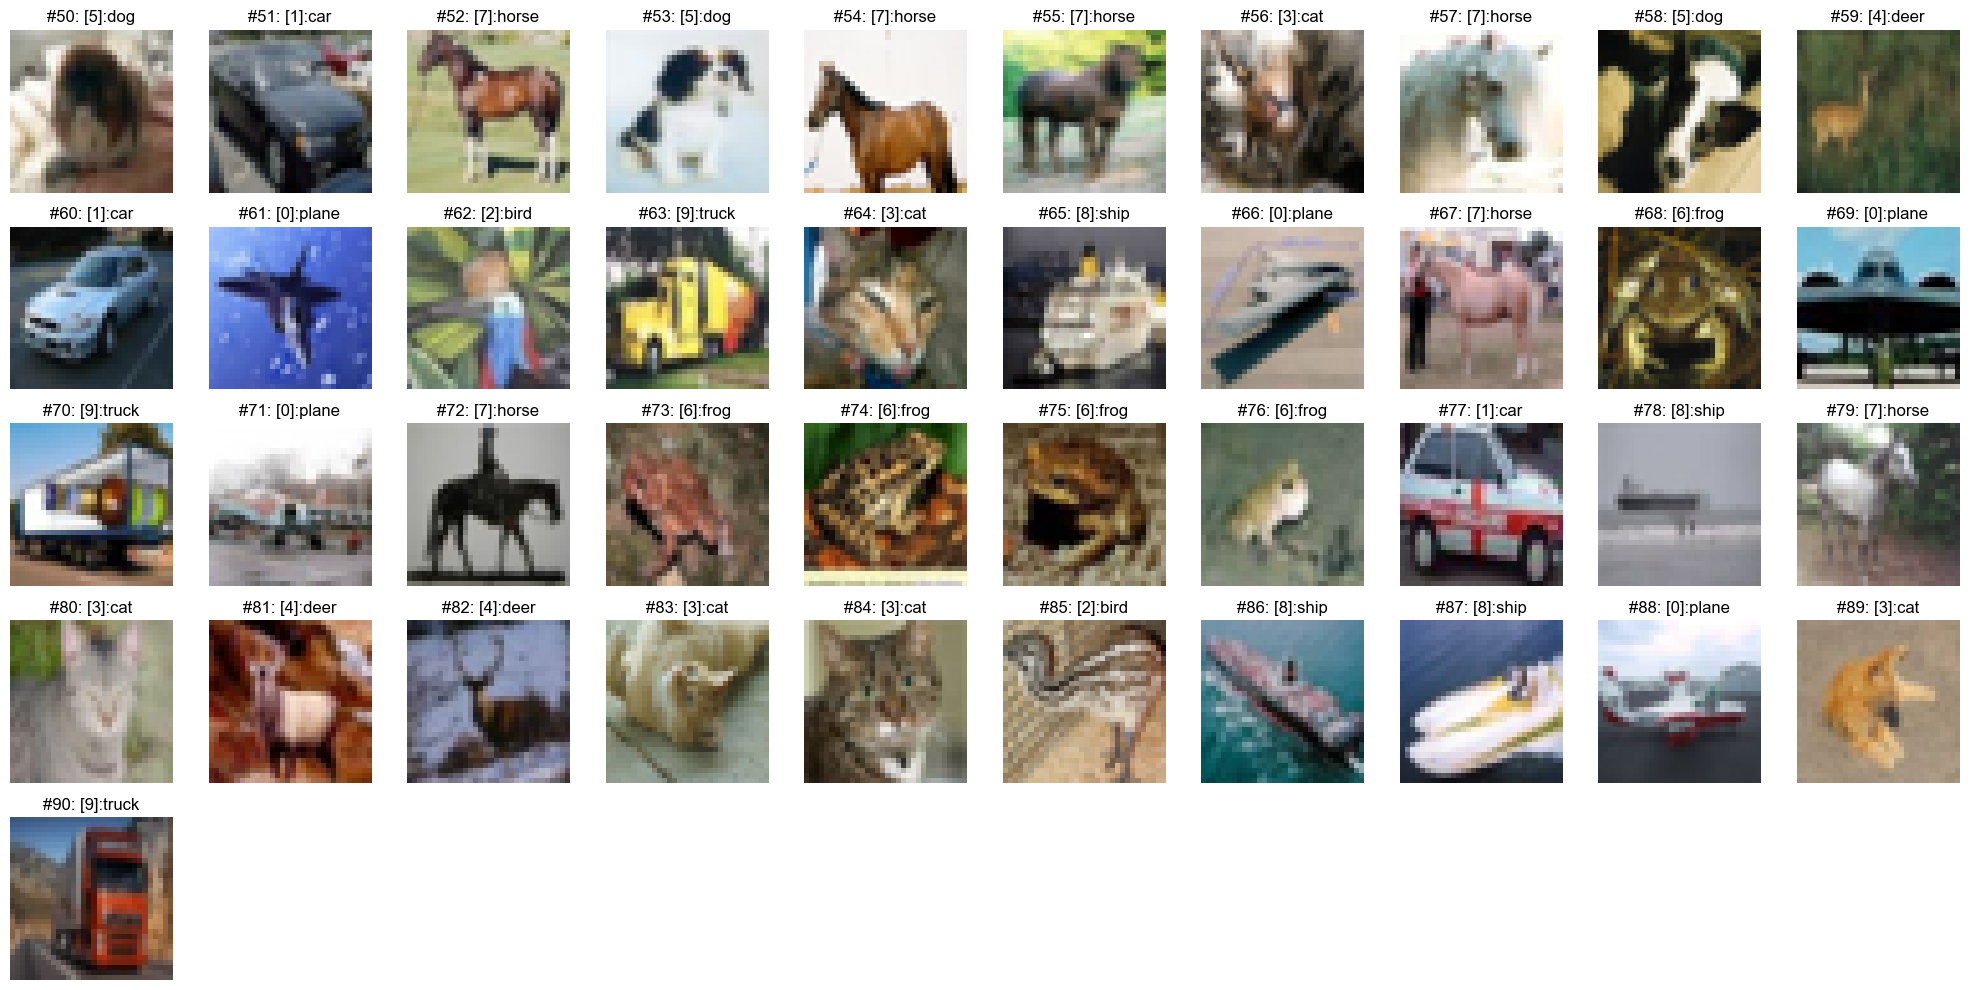

In [56]:
 # 示例2: 显示索引为50-59的图片
print("\n2. 显示索引100-159的图片:")
show_images_by_range(50, 90)

In [ ]:

# 使用示例
if __name__ == "__main__":
    viewer = CIFAR10Viewer()
    
    print("\n" + "="*50)
    print("CIFAR-10测试集查看器")
    print("="*50)
    
    # 示例1: 显示前20张图片
    print("\n1. 显示前20张图片:")
    viewer.show_images_by_range(0, 19)
    
    # 示例2: 显示索引为50-59的图片
    print("\n2. 显示索引50-59的图片:")
    viewer.show_images_by_range(50, 59)
    
    # 示例3: 显示随机10张图片
    print("\n3. 显示随机10张图片:")
    viewer.show_random_images(10)
    
    # 示例4: 显示指定索引的图片
    print("\n4. 显示指定索引的图片:")
    viewer.show_images_by_indices([100, 200, 300, 500, 999])
    
    # 示例5: 搜索特定类别
    print("\n5. 搜索所有猫的图片:")
    cat_indices = viewer.search_by_class('cat')
    if cat_indices:
        viewer.show_images_by_indices(cat_indices[:9])  # 显示前9张猫的图片
    
    # 获取统计信息
    print("\n6. 测试集统计:")
    viewer.get_statistics()

图片 1: 类别 = cat (标签值: 3)
图片 2: 类别 = frog (标签值: 6)
图片 3: 类别 = cat (标签值: 3)
图片 4: 类别 = dog (标签值: 5)
图片 5: 类别 = dog (标签值: 5)
图片 6: 类别 = horse (标签值: 7)
图片 7: 类别 = dog (标签值: 5)
图片 8: 类别 = truck (标签值: 9)
图片 9: 类别 = deer (标签值: 4)
图片 10: 类别 = deer (标签值: 4)
图片 11: 类别 = deer (标签值: 4)
图片 12: 类别 = plane (标签值: 0)
图片 13: 类别 = horse (标签值: 7)
图片 14: 类别 = plane (标签值: 0)
图片 15: 类别 = horse (标签值: 7)
图片 16: 类别 = horse (标签值: 7)
图片 17: 类别 = frog (标签值: 6)
图片 18: 类别 = cat (标签值: 3)
图片 19: 类别 = ship (标签值: 8)
图片 20: 类别 = truck (标签值: 9)
图片 21: 类别 = ship (标签值: 8)
图片 22: 类别 = bird (标签值: 2)
图片 23: 类别 = ship (标签值: 8)
图片 24: 类别 = ship (标签值: 8)
图片 25: 类别 = frog (标签值: 6)
图片 26: 类别 = deer (标签值: 4)
图片 27: 类别 = car (标签值: 1)
图片 28: 类别 = ship (标签值: 8)
图片 29: 类别 = frog (标签值: 6)
图片 30: 类别 = plane (标签值: 0)
图片 31: 类别 = ship (标签值: 8)
图片 32: 类别 = ship (标签值: 8)
图片 33: 类别 = dog (标签值: 5)
图片 34: 类别 = ship (标签值: 8)
图片 35: 类别 = truck (标签值: 9)
图片 36: 类别 = frog (标签值: 6)
图片 37: 类别 = ship (标签值: 8)
图片 38: 类别 = dog (标签值: 5)
图片 39: 类别 = frog (标签

/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/2139335749.py:29: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.tight_layout()
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/2139335749.py:29: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.tight_layout()
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/2139335749.py:29: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/2139335749.py:29: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  plt.tight_layout()
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/2139335749.py:29: UserWarning: Glyph 24352 (\N{CJK UNIFIED IDEOGRAPH-5F20}) missing from current font.
  plt.tight_layout()
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipyker

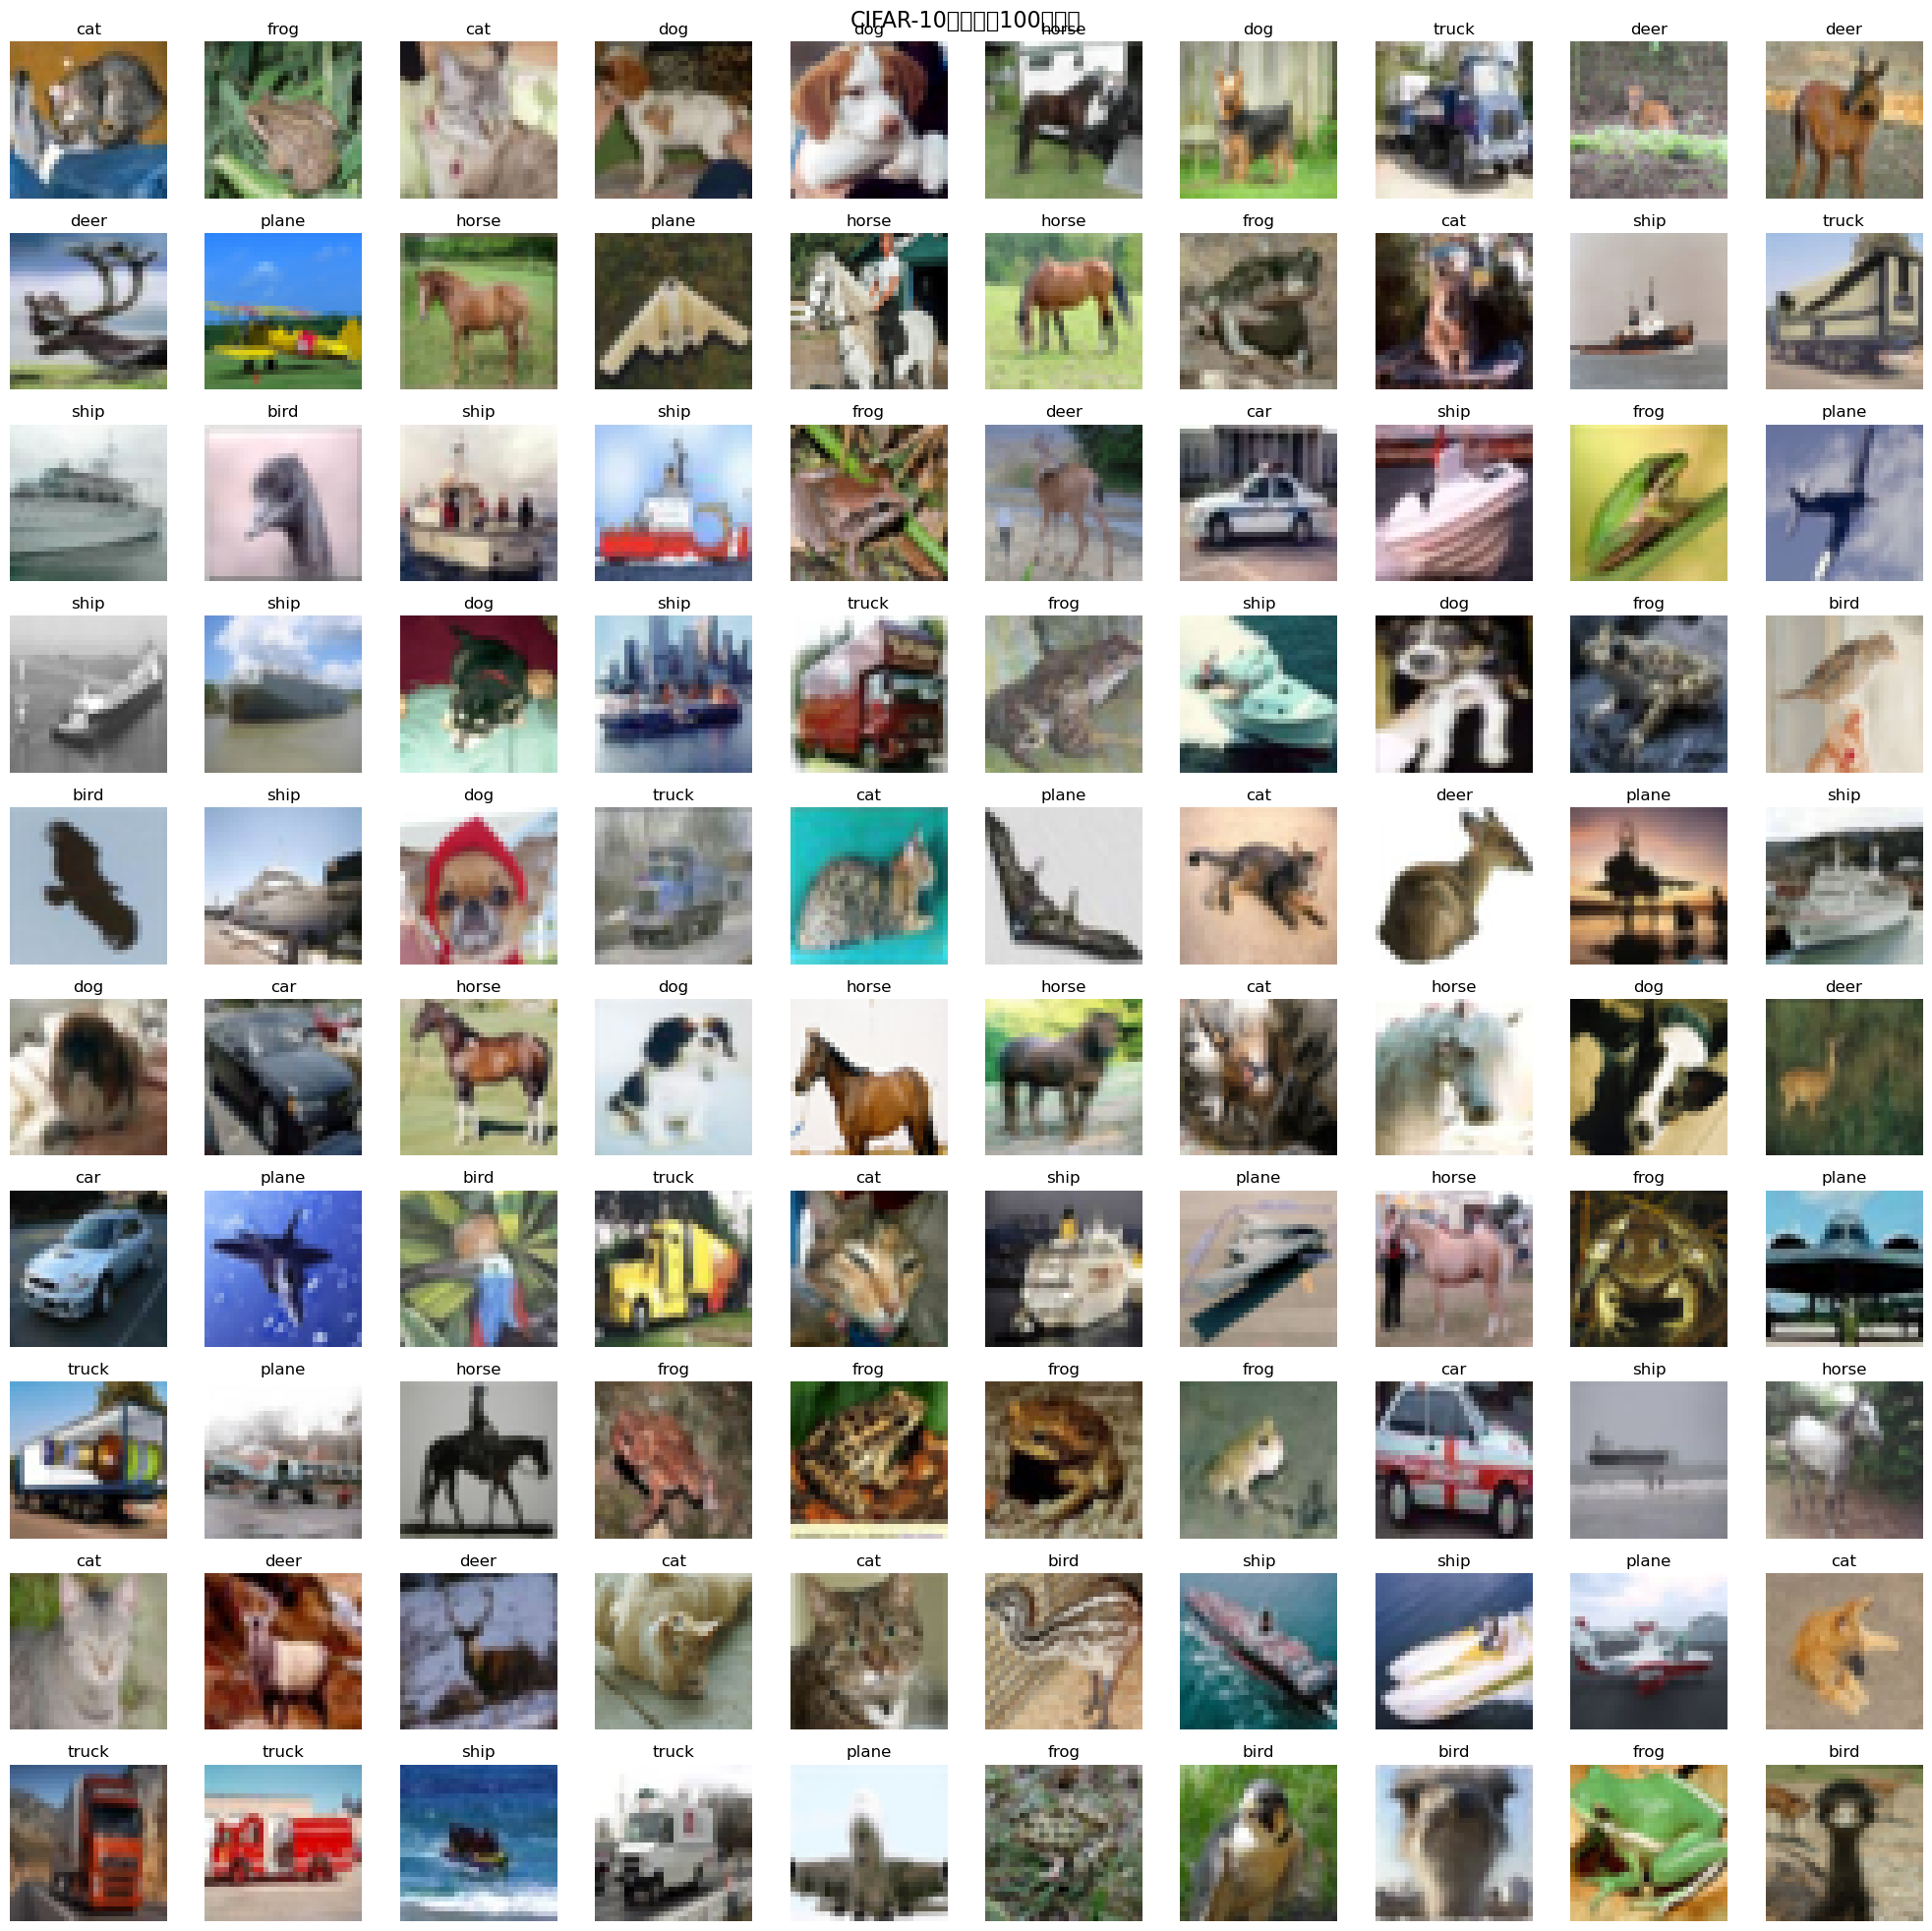

100

In [30]:
show_test_images()

In [51]:


def show_test_images_detailed(num_images=100):
    """详细显示前num_images张测试图片，包括批量显示和详细信息"""
    
    print(f"正在加载CIFAR-10测试集前{num_images}张图片...")
    print("=" * 50)
    
    # 收集图片和标签
    images_list = []
    labels_list = []
    
    for i, (images, labels) in enumerate(testloader):
        if i >= num_images:
            break
        images_list.append(images[0])  # 去掉batch维度
        labels_list.append(labels[0].item())
    
    images_tensor = torch.stack(images_list)
    
    # 显示图片网格
    plt.figure(figsize=(20, 20))
    
    for idx in range(min(num_images, 100)):
        plt.subplot(10, 10, idx + 1)
        
        # 反归一化
        img = images_tensor[idx] / 2 + 0.5
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))
        
        # 确保像素值在0-1之间
        img_np = np.clip(img_np, 0, 1)
        
        plt.imshow(img_np)
        plt.title(f'{classes[labels_list[idx]]}', fontsize=10)
        plt.axis('off')
        
        # 打印详细信息
        print(f"图片 {idx+1:3d}: 类别 = {classes[labels_list[idx]]:>5s} (标签值: {labels_list[idx]})")
    
    plt.suptitle(f'CIFAR-10测试集前{num_images}张图片', fontsize=16)
    plt.tight_layout()
    plt.savefig('test_images_grid.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # 统计各类别数量
    from collections import Counter
    label_counts = Counter(labels_list)
    
    print("\n" + "=" * 50)
    print("类别统计:")
    for i, class_name in enumerate(classes):
        count = label_counts.get(i, 0)
        percentage = (count / num_images) * 100
        print(f"{class_name:>5s}: {count:3d}张 ({percentage:5.1f}%)")
    
    return len(images_list)


In [27]:

# 使用模型进行预测
outputs = net(images_2)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  deer  frog  dog   frog 


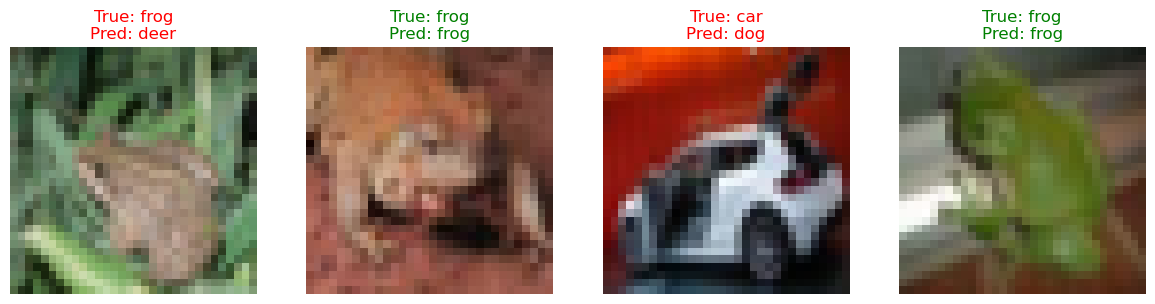

In [28]:
import time
# 创建子图显示4张图片
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    # 显示图片
    img = images_2[i] / 2 + 0.5  # 反归一化
    img = np.transpose(img.numpy(), (1, 2, 0))
    axes[i].imshow(img)
    axes[i].axis('off')
    
    # 显示真实标签和预测标签
    true_label = classes[labels_2[i]]
    pred_label = classes[predicted[i]]
    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(f'True: {true_label}\nPred: {pred_label}', color=color)

plt.tight_layout()
plt.savefig('./predictions_visualization'+str(time.time())+'.png')
plt.show()


In [19]:

# 打印详细的预测信息
print("\n详细预测结果:")
print("=" * 50)
for i in range(4):
    true_label = classes[labels[i]]
    pred_label = classes[predicted[i]]
    confidence = torch.nn.functional.softmax(outputs[i], dim=0)[predicted[i]].item()
    
    print(f"图片 {i+1}:")
    print(f"  真实类别: {true_label}")
    print(f"  预测类别: {pred_label}")
    print(f"  置信度: {confidence:.2%}")
    print(f"  结果: {'✓ 正确' if true_label == pred_label else '✗ 错误'}")
    print()

print("预测结果总结:")
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))
print('Actual:    ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


详细预测结果:
图片 1:
  真实类别: cat
  预测类别: dog
  置信度: 42.55%
  结果: ✗ 错误

图片 2:
  真实类别: ship
  预测类别: dog
  置信度: 87.86%
  结果: ✗ 错误

图片 3:
  真实类别: ship
  预测类别: car
  置信度: 55.79%
  结果: ✗ 错误

图片 4:
  真实类别: plane
  预测类别: horse
  置信度: 100.00%
  结果: ✗ 错误

预测结果总结:
Predicted:  dog   dog   car   horse
Actual:     cat   ship  ship  plane


In [57]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [58]:

class CIFAR10FullPredictor:
    def __init__(self):
        # 定义数据转换
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        
        # 加载测试集
        self.testset = torchvision.datasets.CIFAR10(
            root='./data', 
            train=False, 
            download=True, 
            transform=self.transform
        )
        
        self.testloader = torch.utils.data.DataLoader(
            self.testset, 
            batch_size=100,  # 批处理大小
            shuffle=False, 
            num_workers=0
        )
        
        # 类别名称
        self.classes = ('plane', 'car', 'bird', 'cat', 'deer', 
                       'dog', 'frog', 'horse', 'ship', 'truck')
        
        # 加载模型
        self.load_model()
    
    def load_model(self):
        """加载预训练模型"""
        import torch.nn as nn
        import torch.nn.functional as F
        
        class Net(nn.Module):
            def __init__(self):
                super(Net, self).__init__()
                self.conv1 = nn.Conv2d(3, 6, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5)
                self.fc1 = nn.Linear(16 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = x.view(-1, 16 * 5 * 5)
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x
        
        self.model = Net()
        
        # 尝试加载预训练权重
        try:
            self.model.load_state_dict(torch.load('./cifar_net.pth'))
            print("成功加载预训练模型")
        except FileNotFoundError:
            print("未找到预训练模型，使用随机初始化的模型")
        
        self.model.eval()
    
    def predict_all(self):
        """对测试集进行全量预测"""
        print("开始进行全量预测...")
        
        all_images = []
        all_labels = []
        all_predictions = []
        all_probabilities = []
        
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(self.testloader):
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)
                
                # 保存数据
                all_images.extend(images)
                all_labels.extend(labels.numpy())
                all_predictions.extend(predicted.numpy())
                
                # 计算概率
                probabilities = torch.nn.functional.softmax(outputs, dim=1)
                all_probabilities.extend(probabilities.numpy())
                
                # 统计正确率
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                if batch_idx % 10 == 0:
                    print(f"已处理 {total}/10000 张图片...")
        
        accuracy = 100 * correct / total
        print(f"测试集准确率: {accuracy:.2f}%")
        
        return all_images, all_labels, all_predictions, all_probabilities
    
    def create_visualizations(self, images, labels, predictions, max_display=100):
        """创建可视化图表"""
        
        # 1. 创建预测对比图
        self.create_prediction_comparison(images, labels, predictions, max_display)
        
        # 2. 创建混淆矩阵
        self.create_confusion_matrix(labels, predictions)
        
        # 3. 创建类别准确率柱状图
        self.create_class_accuracy_chart(labels, predictions)
        
        # 4. 创建错误案例分析
        self.create_error_analysis(images, labels, predictions)
    
    def create_prediction_comparison(self, images, labels, predictions, max_display=100):
        """创建预测对比图"""
        
        # 找出预测正确和错误的案例
        correct_indices = [i for i, (l, p) in enumerate(zip(labels, predictions)) if l == p]
        wrong_indices = [i for i, (l, p) in enumerate(zip(labels, predictions)) if l != p]
        
        # 显示部分正确预测
        if correct_indices:
            self.display_images_grid(
                images, labels, predictions, 
                correct_indices[:min(50, len(correct_indices))], 
                title="正确预测案例", 
                filename="correct_predictions.png"
            )
        
        # 显示部分错误预测
        if wrong_indices:
            self.display_images_grid(
                images, labels, predictions, 
                wrong_indices[:min(50, len(wrong_indices))], 
                title="错误预测案例", 
                filename="wrong_predictions.png"
            )
    
    def display_images_grid(self, images, labels, predictions, indices, title, filename):
        """显示图片网格"""
        
        n_images = len(indices)
        n_cols = min(10, n_images)
        n_rows = (n_images + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        for i, idx in enumerate(indices):
            # 反归一化图片
            img = images[idx] / 2 + 0.5
            img_np = img.numpy().transpose(1, 2, 0)
            img_np = np.clip(img_np, 0, 1)
            
            axes[i].imshow(img_np)
            true_label = self.classes[labels[idx]]
            pred_label = self.classes[predictions[idx]]
            
            color = 'green' if labels[idx] == predictions[idx] else 'red'
            axes[i].set_title(
                f'True: {true_label}\nPred: {pred_label}', 
                color=color, fontsize=10
            )
            axes[i].axis('off')
        
        # 隐藏多余的子图
        for i in range(n_images, len(axes)):
            axes[i].axis('off')
        
        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
    
    def create_confusion_matrix(self, labels, predictions):
        """创建混淆矩阵"""
        
        cm = confusion_matrix(labels, predictions)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.classes, yticklabels=self.classes)
        plt.title('混淆矩阵')
        plt.xlabel('预测标签')
        plt.ylabel('真实标签')
        plt.tight_layout()
        plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    def create_class_accuracy_chart(self, labels, predictions):
        """创建类别准确率柱状图"""
        
        class_correct = [0] * 10
        class_total = [0] * 10
        
        for label, pred in zip(labels, predictions):
            class_total[label] += 1
            if label == pred:
                class_correct[label] += 1
        
        accuracies = [100 * class_correct[i] / class_total[i] 
                     if class_total[i] > 0 else 0 
                     for i in range(10)]
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(self.classes, accuracies, color='skyblue', edgecolor='navy')
        plt.title('各类别预测准确率')
        plt.xlabel('类别')
        plt.ylabel('准确率 (%)')
        plt.ylim(0, 100)
        
        # 添加数值标签
        for bar, acc in zip(bars, accuracies):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{acc:.1f}%', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig('class_accuracies.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    def create_error_analysis(self, images, labels, predictions):
        """创建错误案例分析"""
        
        # 统计每个类别的错误情况
        class_errors = {i: [] for i in range(10)}
        
        for i, (label, pred) in enumerate(zip(labels, predictions)):
            if label != pred:
                class_errors[label].append((i, pred))
        
        # 显示每个类别的常见错误
        print("\n错误案例分析:")
        print("=" * 50)
        
        for class_idx in range(10):
            errors = class_errors[class_idx]
            if errors:
                # 统计该类别的错误预测分布
                pred_counts = {}
                for _, pred in errors:
                    pred_counts[pred] = pred_counts.get(pred, 0) + 1
                
                # 找出最常见的错误预测
                most_common_wrong = max(pred_counts.items(), key=lambda x: x[1])
                
                print(f"\n{self.classes[class_idx]} -> {self.classes[most_common_wrong[0]]}: "
                      f"{most_common_wrong[1]} 次错误")
    
    def run_full_analysis(self):
        """运行完整的分析流程"""
        
        # 1. 进行全量预测
        images, labels, predictions, probabilities = self.predict_all()
        
        # 2. 创建可视化
        self.create_visualizations(images, labels, predictions)
        
        # 3. 打印总结
        self.print_summary(labels, predictions)
    
    def print_summary(self, labels, predictions):
        """打印分析总结"""
        
        total = len(labels)
        correct = sum(1 for l, p in zip(labels, predictions) if l == p)
        
        print("\n" + "="*60)
        print("CIFAR-10 测试集预测分析总结")
        print("="*60)
        print(f"总图片数: {total}")
        print(f"正确预测: {correct}")
        print(f"错误预测: {total - correct}")
        print(f"总体准确率: {100 * correct / total:.2f}%")
        
        # 各类别统计
        class_stats = {}
        for class_idx in range(10):
            class_total = sum(1 for l in labels if l == class_idx)
            class_correct = sum(1 for l, p in zip(labels, predictions) 
                              if l == class_idx and l == p)
            if class_total > 0:
                class_stats[class_idx] = {
                    'total': class_total,
                    'correct': class_correct,
                    'accuracy': 100 * class_correct / class_total
                }
        
        print("\n各类别准确率:")
        for class_idx in range(10):
            if class_idx in class_stats:
                stats = class_stats[class_idx]
                print(f"{self.classes[class_idx]:>5s}: "
                      f"{stats['accuracy']:5.1f}% "
                      f"({stats['correct']:3d}/{stats['total']:3d})")



Files already downloaded and verified


/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_93006/651774456.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load('./cifa

成功加载预训练模型
开始进行全量预测...
已处理 100/10000 张图片...
已处理 1100/10000 张图片...
已处理 2100/10000 张图片...
已处理 3100/10000 张图片...
已处理 4100/10000 张图片...
已处理 5100/10000 张图片...
已处理 6100/10000 张图片...
已处理 7100/10000 张图片...
已处理 8100/10000 张图片...
已处理 9100/10000 张图片...
测试集准确率: 61.91%


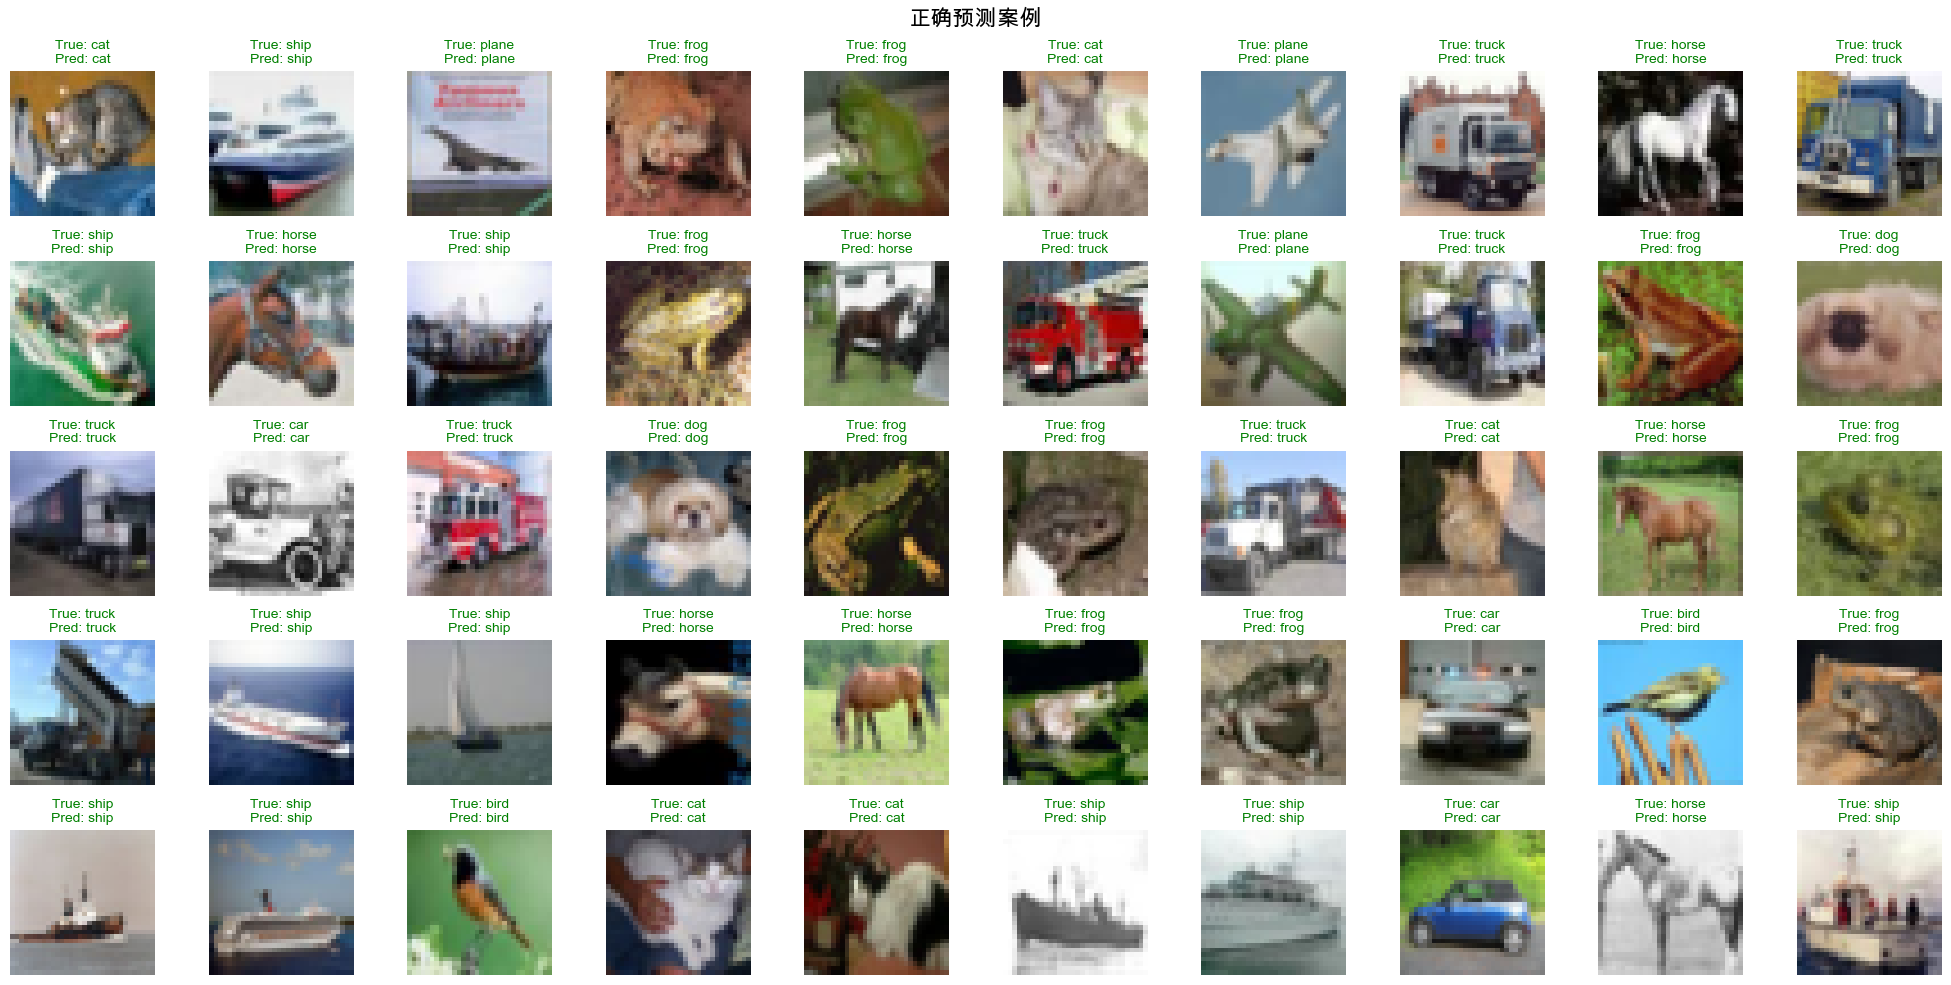

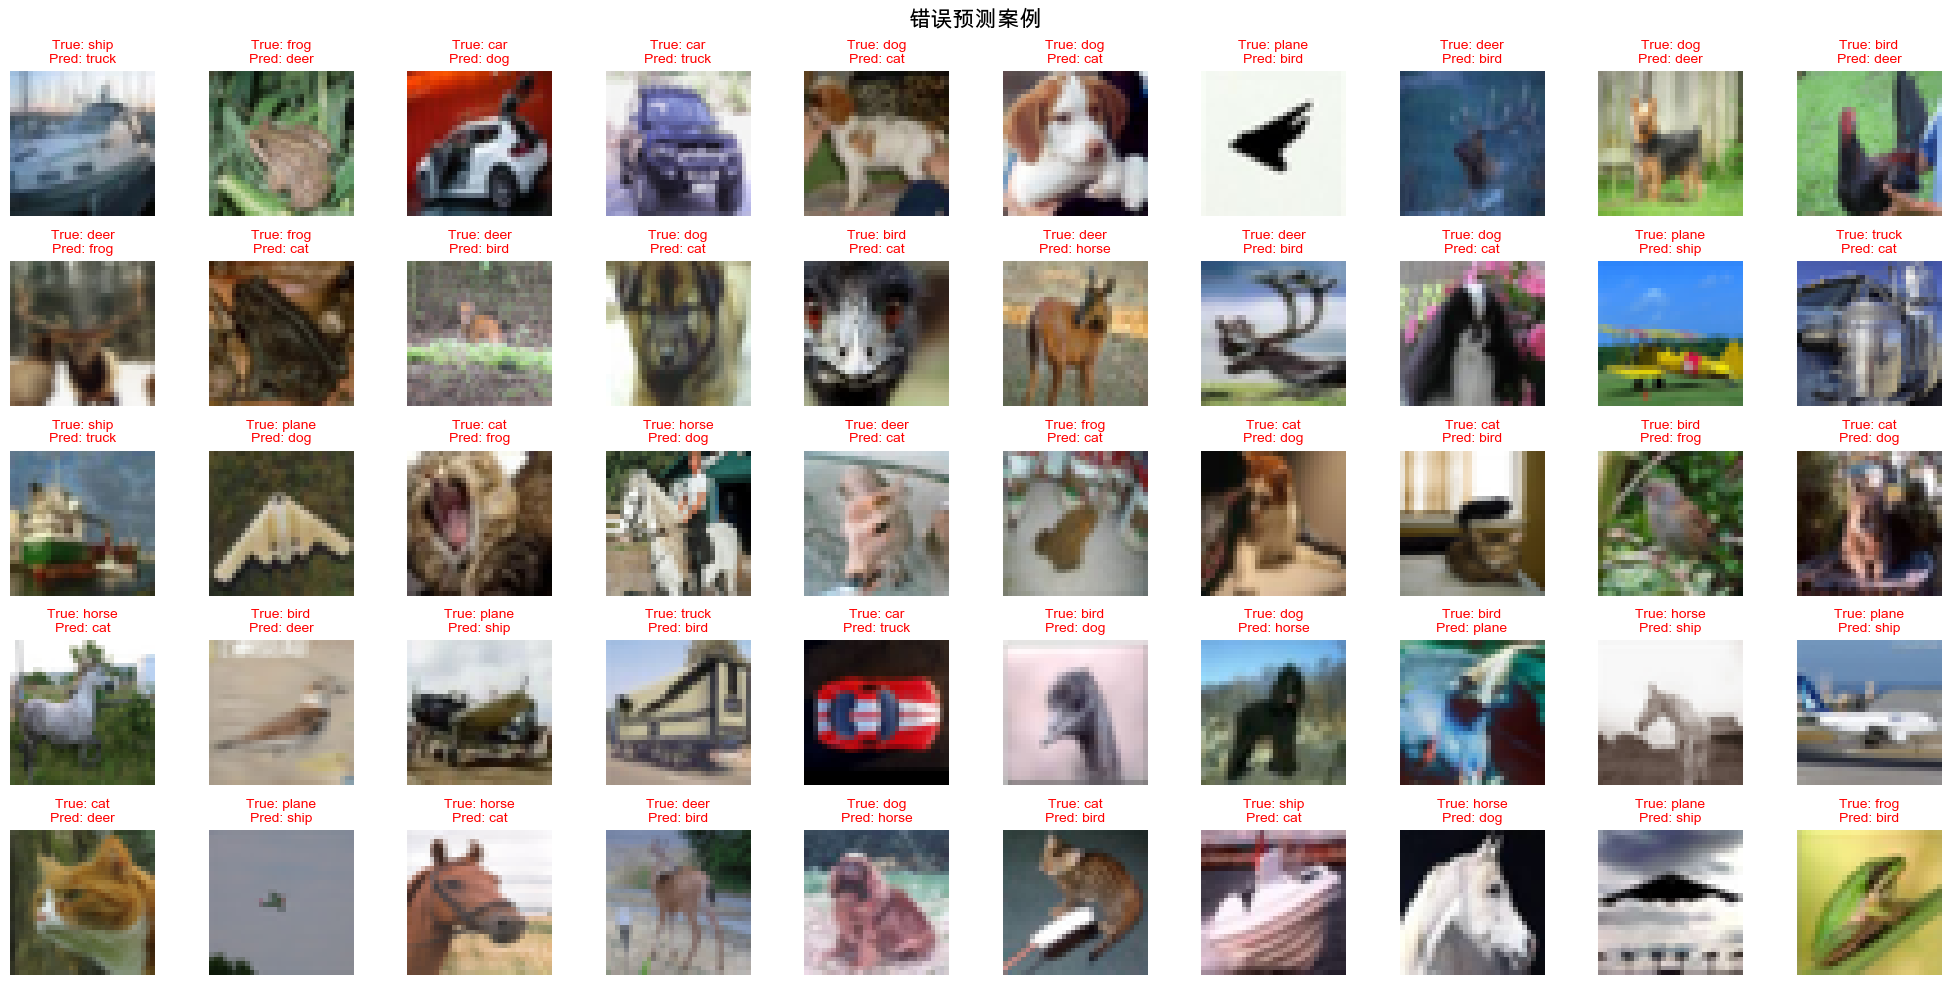

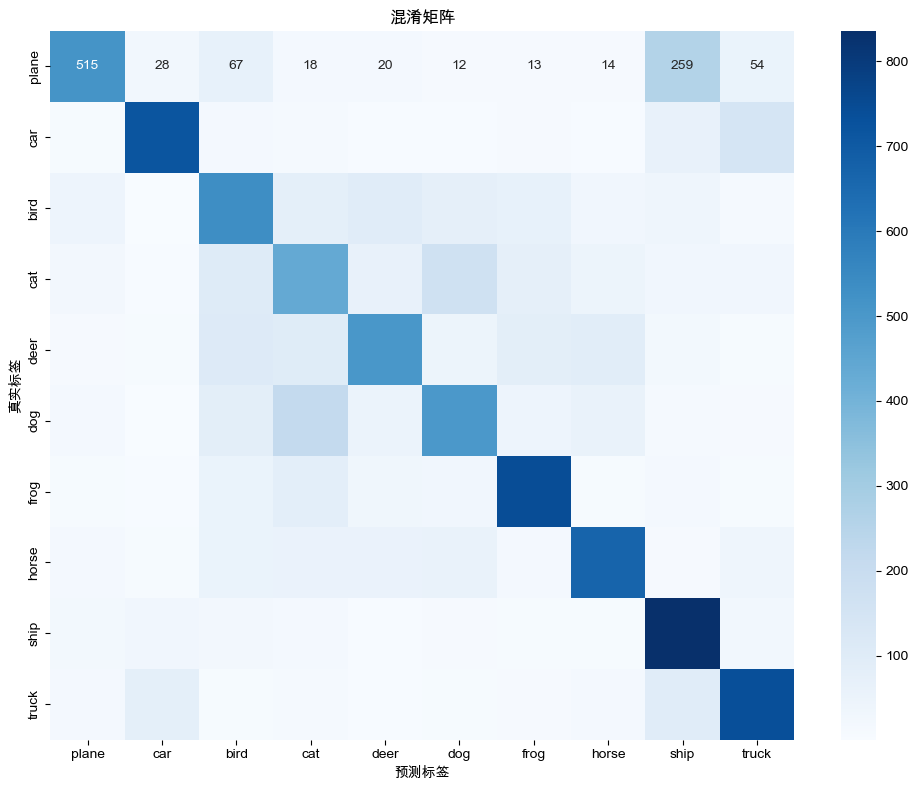

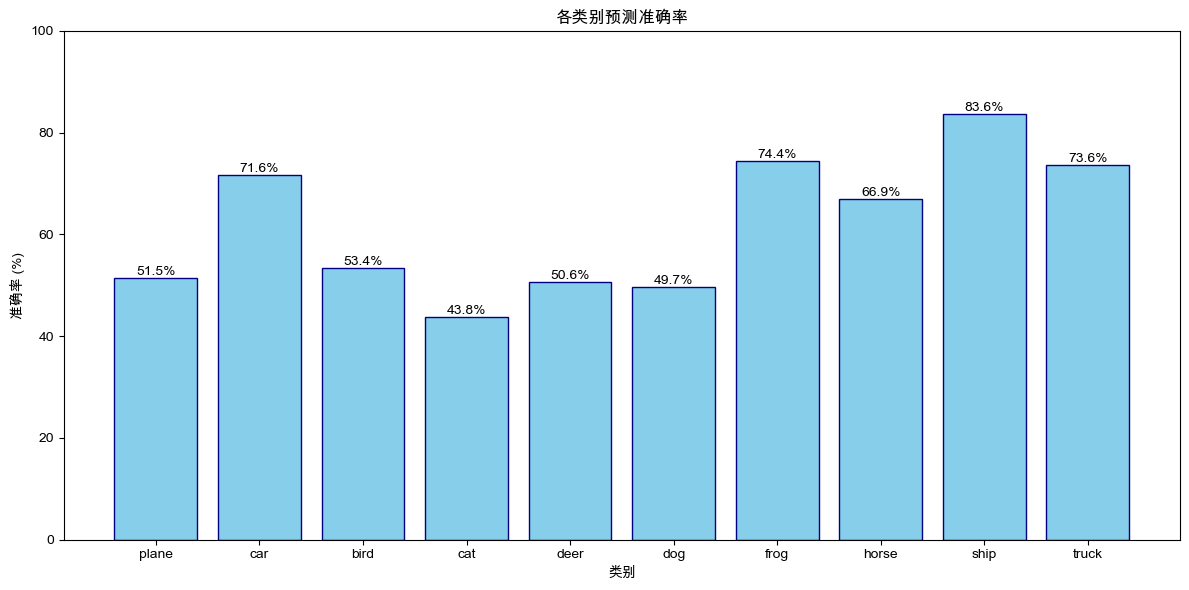


错误案例分析:

plane -> ship: 259 次错误

car -> truck: 145 次错误

bird -> deer: 98 次错误

cat -> dog: 172 次错误

deer -> bird: 111 次错误

dog -> cat: 215 次错误

frog -> cat: 85 次错误

horse -> dog: 60 次错误

ship -> car: 32 次错误

truck -> ship: 96 次错误

CIFAR-10 测试集预测分析总结
总图片数: 10000
正确预测: 6191
错误预测: 3809
总体准确率: 61.91%

各类别准确率:
plane:  51.5% (515/1000)
  car:  71.6% (716/1000)
 bird:  53.4% (534/1000)
  cat:  43.8% (438/1000)
 deer:  50.6% (506/1000)
  dog:  49.7% (497/1000)
 frog:  74.4% (744/1000)
horse:  66.9% (669/1000)
 ship:  83.6% (836/1000)
truck:  73.6% (736/1000)


In [59]:
# 使用示例
if __name__ == "__main__":
    predictor = CIFAR10FullPredictor()
    predictor.run_full_analysis()

错误案例分析:
==================================================

plane -> ship: 259 次错误

car -> truck: 145 次错误

bird -> deer: 98 次错误

cat -> dog: 172 次错误

deer -> bird: 111 次错误

dog -> cat: 215 次错误

frog -> cat: 85 次错误

horse -> dog: 60 次错误

ship -> car: 32 次错误

truck -> ship: 96 次错误

============================================================
CIFAR-10 测试集预测分析总结
============================================================
总图片数: 10000
正确预测: 6191
错误预测: 3809
总体准确率: 61.91%

各类别准确率:
plane:  51.5% (515/1000)
  car:  71.6% (716/1000)
 bird:  53.4% (534/1000)
  cat:  43.8% (438/1000)
 deer:  50.6% (506/1000)
  dog:  49.7% (497/1000)
 frog:  74.4% (744/1000)
horse:  66.9% (669/1000)
 ship:  83.6% (836/1000)
truck:  73.6% (736/1000)